PREDICTING USED CARS PRICE
the dataset is taken from kaggle : 
https://www.kaggle.com/avikasliwal/used-cars-price-prediction?select=train-data.csv
uploaded by Avi Kasliwal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['figure.figsize'] = (15, 7)
#sns.set(rc={'figure.figsize':(15,7)})
#%matplotlib inline

In [2]:
#Doing some initial data anylsis
df = pd.read_csv('train_data_clean0.csv')
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


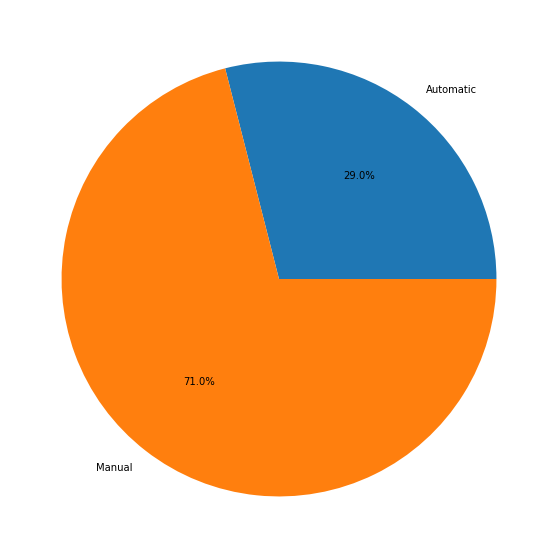

In [3]:
#lets find out from the training data, how many automatic and manual car
car_transmission = df.groupby('Transmission')[['Name']].count()
car_transmission.plot.pie(y='Name', figsize=(10,10), autopct='%1.1f%%', legend=False)
plt.ylabel('')
plt.savefig('manualvstransmissionpie.png', bbox_inches = 'tight')
plt.show()
#there are more manual car in the training data than automatic

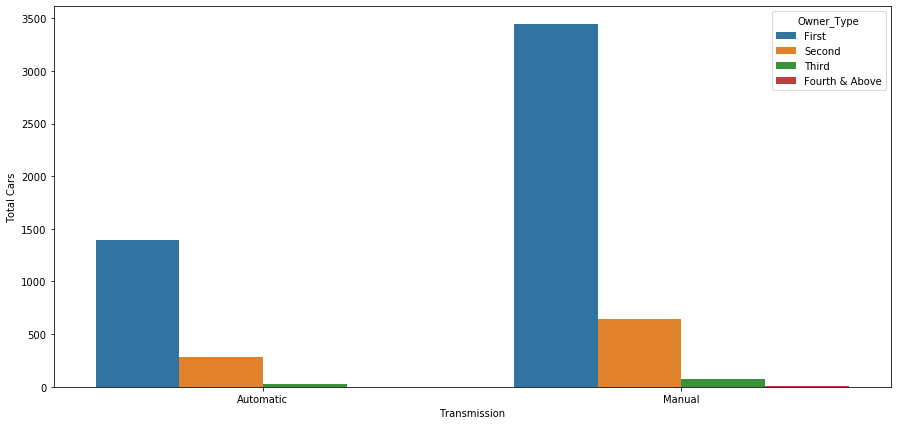

In [4]:
#lets find out how many first hand owner than 2nd,3rd and 4th in the manual vs automatic category
car_transmission = df.groupby(['Transmission', 'Owner_Type'])[['Name']].count().sort_values(by=['Transmission', 'Name'], ascending=[True, False]).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(data=car_transmission, x='Transmission', y='Name', hue='Owner_Type')
plt.ylabel('Total Cars')
plt.savefig('manualvstransmissionownertype.png', bbox_inches = 'tight')
plt.show()
#In both category, there are more first owner than second or third
plt.close()

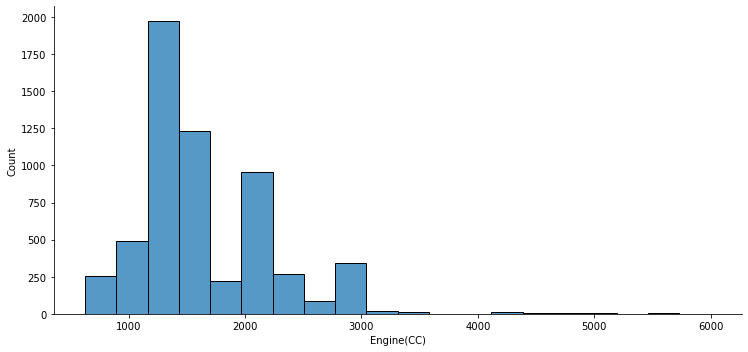

In [5]:
#using histogram to see the distribution of cars powers
sns.displot(df, x='Engine(CC)', bins=20, aspect=2.1)
plt.savefig('powerdistribution.png', bbox_inches = 'tight')
plt.show()
plt.close()
#hmm 

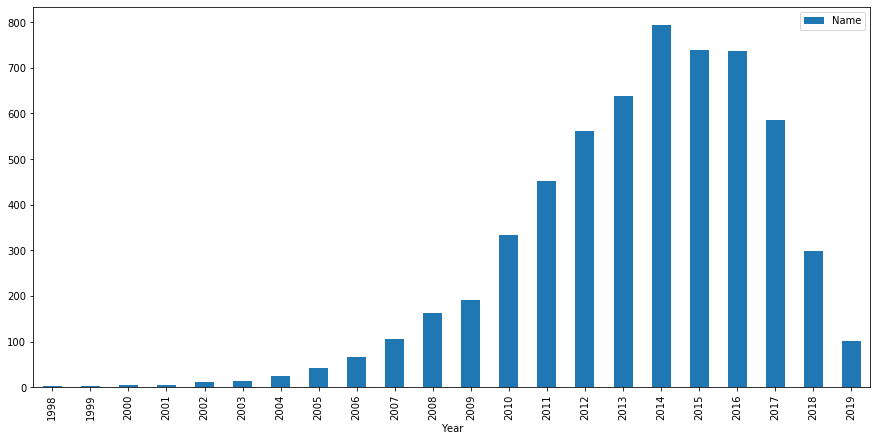

In [26]:
#now lets see base on year, how many cars per grouped year
cars_year = df.groupby('Year')[['Name']].count()#.sort_values('Name', ascending=False)
cars_year.plot.bar(figsize=(15, 7))
plt.show()
#the years goes from 1998 to 2019

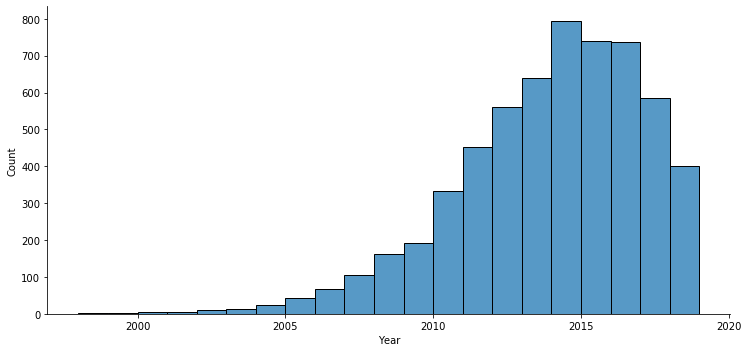

In [7]:
#lets also see the distribution
sns.displot(df, x='Year', bins=21, aspect=2.1)
plt.savefig('yeardistribution.png', bbox_inches = 'tight')
plt.show()
#there are more cars around 2015
#the hist is also skewed to the left
#this means there are outliers, this must be drop to improve our model later

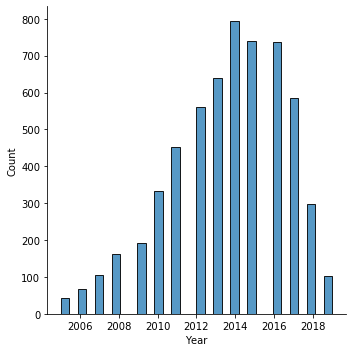

In [8]:
sns.displot(df[df['Year']>=2005], x='Year')
plt.savefig('yeardistribution2.png', bbox_inches = 'tight')
plt.show()

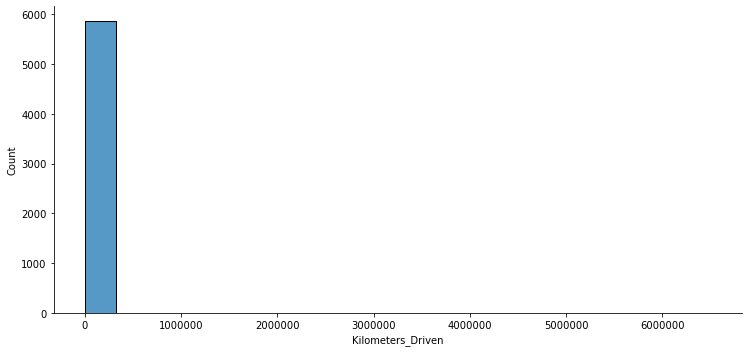

In [9]:
#lets see the distribution of kilometer driven
sns.displot(df, x='Kilometers_Driven', bins=20, aspect=2.1)
plt.savefig('kilometerdistribution.png', bbox_inches = 'tight')
plt.show()

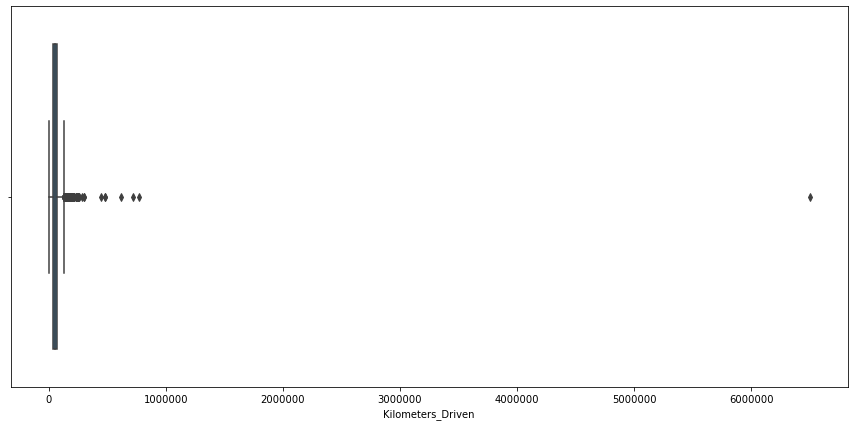

In [10]:
#base on kilomtter distribution, it seems that there are many outliers
#lets just see the boxplot
plt.figure(figsize=(15, 7))
sns.boxplot(data = df, x='Kilometers_Driven')
plt.savefig('kilometerdboxplot.png', bbox_inches = 'tight')
plt.show()
#there is definitely outliers

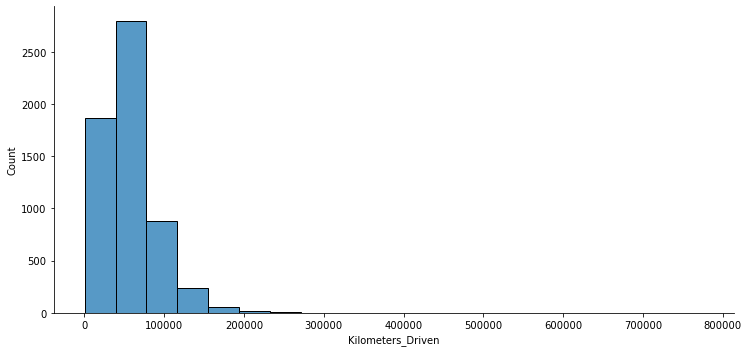

In [11]:
#lets get rid of this outliers by selectinng kilometers driven from 0 to 1.000.000
sns.displot(df[df['Kilometers_Driven']<=1000000], x='Kilometers_Driven', bins=20, aspect=2.1)
plt.savefig('kilometerdistribution2.png', bbox_inches = 'tight')
#hmm there are still outliers
plt.show()

In [12]:
#lets take a look at our dataframe again, selecting only kilomters below 300.000
#how many rows are still left?
df[df['Kilometers_Driven']<=300000]
#5864 rows left, since our original data has 5872 rows, this should be fine

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


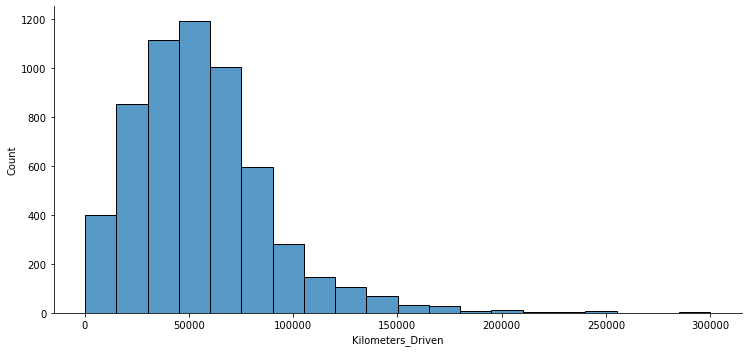

In [13]:
#lets plot the distribution again with taking only kilometers driven below 300.000
sns.displot(df[df['Kilometers_Driven']<=300000], x='Kilometers_Driven', bins=20, aspect=2.1)
plt.savefig('kilometerdistribution3.png', bbox_inches = 'tight')
plt.show()
#definitely better than before, what if we do further by selecting 150.000 and below?

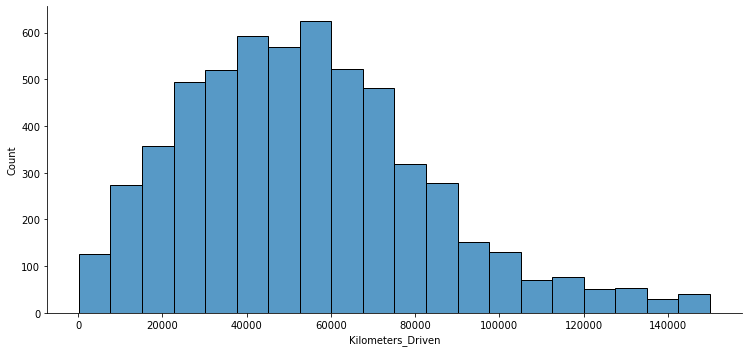

In [14]:
#lets plot the distribution again with taking only kilometers driven below 150.000
sns.displot(df[df['Kilometers_Driven']<=150000], x='Kilometers_Driven', bins=20, aspect=2.1)
plt.savefig('kilometerdistribution4.png', bbox_inches = 'tight')
plt.show()

In [15]:
#how many rows are still left?
df[(df['Kilometers_Driven']<=150000) & (df['Year']>=2005)]
#5872-5707 = 165 rows. this should improve our model later. 
#this 165 is our outliers

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


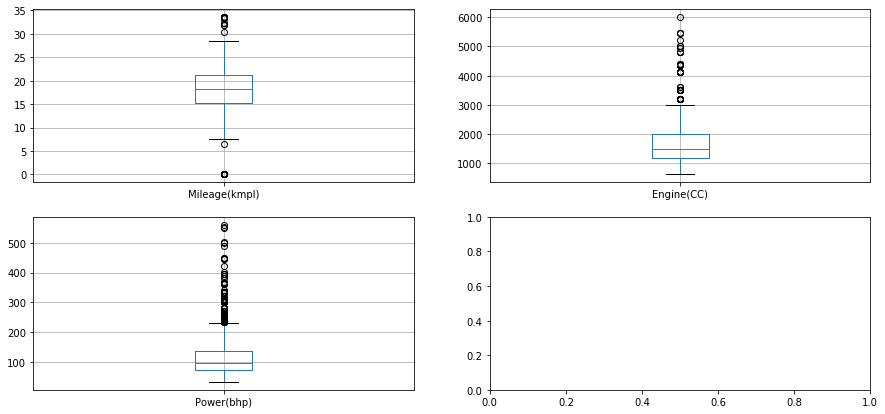

In [16]:
#speaking about outliers i should just checked all columns with potential outliers beside KM drive
#sns.boxplot(data=pd.melt(df[['Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)']]), x="variable", y="value")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
#df.boxplot(column=['Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)'])
df.boxplot(column='Mileage(kmpl)', ax=axes[0,0]) 
df.boxplot(column='Engine(CC)', ax=axes[0,1])
df.boxplot(column='Power(bhp)', ax=axes[1,0]) 
plt.savefig('3boxplot.png', bbox_inches = 'tight')
plt.show()
#definitely outliers

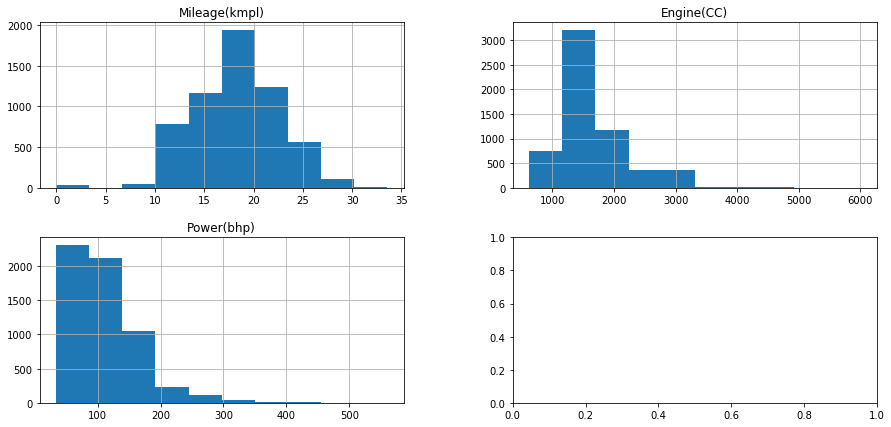

In [17]:
#lets see the histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
#df.boxplot(column=['Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)'])
df.hist(column='Mileage(kmpl)', ax=axes[0,0]) 
df.hist(column='Engine(CC)', ax=axes[0,1])
df.hist(column='Power(bhp)', ax=axes[1,0]) 
plt.savefig('3hist.png', bbox_inches = 'tight')
plt.show()

In [18]:
#lets try to cut these outliers further in our dataframe
df[(df['Kilometers_Driven']<=150000) & (df['Year']>=2005) & (df['Power(bhp)']<=300) & (df['Engine(CC)']<=3500)]
#5650 rows left
#5872 - 5650 = 222 rows, these are our outliers that needs to be drop

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [19]:
#but after dropping the ourliers, our model score seems to be lower compare to dropping outliers in km driven only
#so, i'm going to only drop outliers from km driven

In [ ]:
#for now, it seems we are ready for data processing